## Sobel Edge Detector Pytorch

### Requirements

In [19]:
!pip install torch torchvision torchaudio
!pip install monai
!pip install numpy
!pip install matplotlib
!pip install itk

### Imports

In [1]:
from torch import nn
import torch
import monai
import numpy as np
import matplotlib.pyplot as plt


### Definition of Sobel class inherited by nn.Module

Please add to the class sobel the necessary code to implement a 3D sobel filter 

Use Pytorch for implementation, to later use the class for a loss function (gradients of calculation) 

In [3]:
class Sobel(nn.Module):
    def __init__(self):
        super().__init__()
        self.Gx = nn.Conv3d(1, 1, kernel_size=5)
        self.Gy = nn.Conv3d(1, 1, kernel_size=5)
        self.Gz = nn.Conv3d(1, 1, kernel_size=5)
        
        #Kernels for x, y, z using 5x5 sobel operators 
        self.Gx.weight.data = torch.tensor([[[[[-1,-2,0,2,1],
                                              [-2,-3,0,3,2], 
                                              [-3,-5,0,5,3],
                                              [-2,-3,0,3,2],
                                              [-1,-2,0,2,1]]]]], dtype=torch.float32)
        self.Gy.weight.data = torch.tensor([[[[[1,2,3,2,1],
                                              [2,3,5,3,2], 
                                              [0,0,0,0,0],
                                              [-2,-3,-5,-3,-2],
                                              [-1,-2,-3,-2,-1]]]]], dtype=torch.float32)
        self.Gz.weight.data = torch.tensor([[[[[1,2,3,2,1],
                                              [2,3,5,3,2], 
                                              [0,0,0,0,0],
                                              [-2,-3,-5,-3,-2],
                                              [-1,-2,-3,-2,-1]]]]], dtype=torch.float32)
         
    def forward(self, img):       
        #Gradients for x, y, z 
        grad_x = self.Gx(img)
        grad_y = self.Gy(img)
        grad_z = self.Gz(img)
        #Calculate magnitude
        magnitude= torch.sqrt(grad_x**2 + grad_y**2 + grad_z**2)
        magnitude_np =magnitude.detach().numpy()    
        return magnitude_np


### load volume data with MONAI

In [4]:
img_path = r".\Crete_no7_20um_1821x1671x1455_16bit_trans_376.nii.gz"
load_image = monai.transforms.LoadImage(dtype=np.float32, ensure_channel_first=True)
img = load_image(img_path)
print(img.shape)

torch.Size([1, 140, 140, 140])


### Calculate sobel volume and extract middle slices of each axis from original and sobel volumes

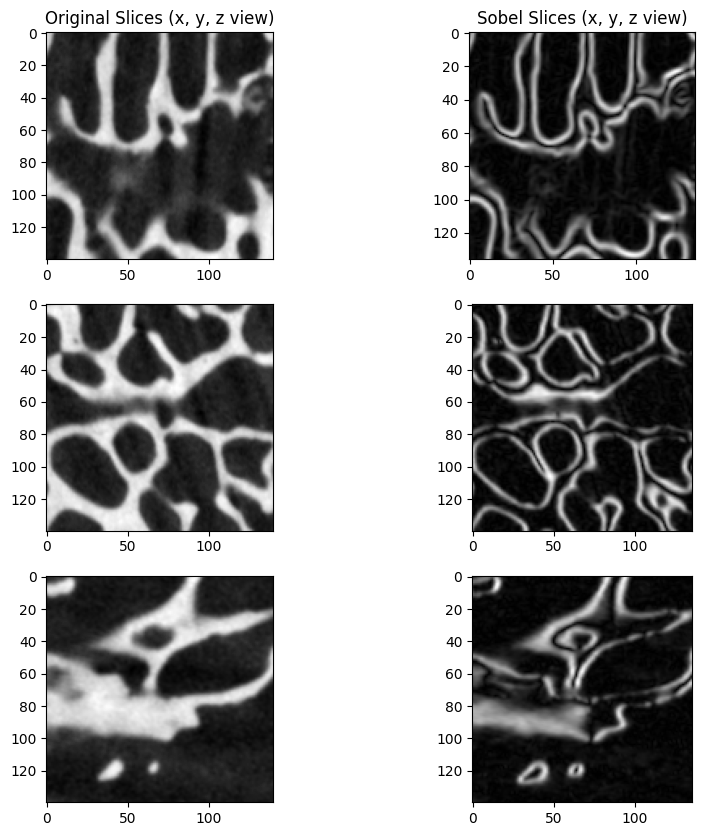

In [5]:
# extract slices from original data
arr_orig = np.array(img[0])
middle_slice_orig_x = arr_orig[int(len(arr_orig) / 2), :, :]
middle_slice_orig_y = arr_orig[:, int(len(arr_orig) / 2), :]
middle_slice_orig_z = arr_orig[:, :, int(len(arr_orig) / 2)]

# create sobel gradient volume
img_sobel = Sobel().forward(img)
arr_sobel = np.array(img_sobel[0])
middle_slice_sobel_x = arr_sobel[int(len(arr_sobel) / 2), :, :]
middle_slice_sobel_y = arr_sobel[:, int(len(arr_sobel) / 2), :]
middle_slice_sobel_z = arr_sobel[:, :, int(len(arr_sobel) / 2)]

# visualize
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes[0, 0].imshow(middle_slice_orig_x, cmap="gray")
axes[0, 0].set_title("Original Slices (x, y, z view)")
axes[0, 1].imshow(middle_slice_sobel_x, cmap="gray")
axes[0, 1].set_title("Sobel Slices (x, y, z view)")
axes[1, 0].imshow(middle_slice_orig_y, cmap="gray")
axes[1, 1].imshow(middle_slice_sobel_y, cmap="gray")
axes[2, 0].imshow(middle_slice_orig_z, cmap="gray")
axes[2, 1].imshow(middle_slice_sobel_z, cmap="gray")

**What we expect as output**

![Sample Image](output_reference.png)
